# Image Classification using CNN with TensorFlow (Dataset - CIFAR10)

## Importing the libraries

In [32]:
from tensorflow.keras import Sequential , datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D , MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os

## Load Dataset

In [33]:
(X_train,y_train) , (X_test,y_test)=datasets.cifar10.load_data()

In [34]:
X_train.shape

(50000, 32, 32, 3)

In [35]:
X_test.shape

(10000, 32, 32, 3)

## Reshaping

In [36]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [37]:
y_classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [38]:
len(y_classes)

10

## Observing the dataset

In [39]:
def showImage(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])

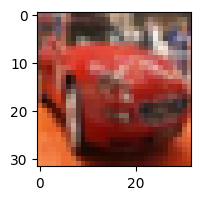

In [40]:
showImage(X_train,y_train,5)

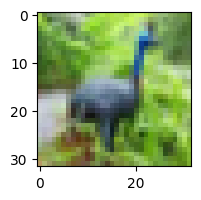

In [41]:
showImage(X_train,y_train,6)

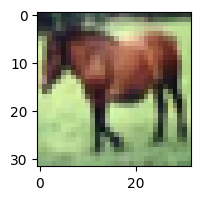

In [42]:
showImage(X_train,y_train,7)

## Normalize the dataset

In [43]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [44]:
X_train=X_train/255
X_test=X_test/255

In [45]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Build the model

In [46]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(4,4),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=34,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model

In [47]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

## Train the model

In [48]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.3712 - loss: 1.7109 - val_accuracy: 0.5848 - val_loss: 1.2047
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5918 - loss: 1.1493 - val_accuracy: 0.6329 - val_loss: 1.0389
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6469 - loss: 1.0097 - val_accuracy: 0.6649 - val_loss: 0.9647
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.6845 - loss: 0.9085 - val_accuracy: 0.6742 - val_loss: 0.9404
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7037 - loss: 0.8566 - val_accuracy: 0.6813 - val_loss: 0.9334
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7234 - loss: 0.8025 - val_accuracy: 0.6998 - val_loss: 0.8740
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.7402 - loss: 0.7490 - val_accuracy: 0.6817 - val_loss: 0.9183
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7557 -

## Make predictions

In [49]:
y_predictions=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [50]:
y_predictions[9]

array([4.56623733e-03, 9.21364367e-01, 9.20149832e-05, 2.42667986e-04,
       2.16655404e-04, 8.28575430e-05, 1.75307377e-03, 1.04567225e-05,
       2.15179916e-03, 6.95198923e-02], dtype=float32)

In [51]:
y_predictions=[np.argmax(arr) for arr in y_predictions]

In [52]:
y_predictions

[8,
 8,
 8,
 8,
 4,
 5,
 1,
 6,
 3,
 1,
 0,
 9,
 3,
 7,
 9,
 6,
 5,
 3,
 8,
 6,
 7,
 2,
 0,
 9,
 4,
 4,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 5,
 7,
 9,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 3,
 7,
 4,
 9,
 8,
 3,
 3,
 8,
 8,
 7,
 5,
 3,
 6,
 7,
 5,
 3,
 3,
 6,
 2,
 1,
 0,
 3,
 9,
 8,
 3,
 8,
 8,
 0,
 2,
 7,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 0,
 8,
 9,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 8,
 0,
 7,
 4,
 6,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 9,
 3,
 0,
 4,
 6,
 5,
 8,
 3,
 1,
 5,
 8,
 0,
 8,
 3,
 3,
 0,
 4,
 1,
 9,
 9,
 1,
 5,
 9,
 7,
 2,
 8,
 6,
 5,
 6,
 5,
 8,
 3,
 6,
 5,
 5,
 3,
 8,
 9,
 6,
 0,
 0,
 5,
 3,
 9,
 3,
 4,
 3,
 1,
 6,
 6,
 0,
 7,
 8,
 6,
 6,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 3,
 0,
 8,
 6,
 3,
 3,
 8,
 5,
 8,
 0,
 1,
 7,
 5,
 8,
 8,
 7,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 5,
 9,
 0,
 9,
 8,
 4,
 7,
 9,
 3,
 2,
 7,
 3,
 9,
 3,
 3,
 9,
 3,
 4,
 0,
 6,
 3,
 9,
 5,
 8,
 8,
 0,
 4,
 7,
 5,
 3,
 1,
 9,
 0,
 9,
 0,
 6,
 9,
 8,
 2,
 4,


In [53]:
y_tes =y_test.reshape(-1, )

In [54]:
y_predictions[3]

8

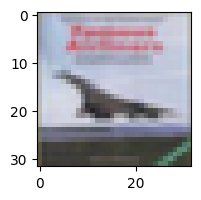

In [55]:
showImage(X_test,y_test,3)

## Evaluate the model

In [56]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6945 - loss: 1.0759


[1.0750316381454468, 0.695900022983551]

## Classification Report

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1000
           1       0.88      0.75      0.81      1000
           2       0.75      0.45      0.56      1000
           3       0.47      0.60      0.53      1000
           4       0.63      0.68      0.65      1000
           5       0.60      0.58      0.59      1000
           6       0.79      0.71      0.75      1000
           7       0.77      0.75      0.76      1000
           8       0.78      0.84      0.81      1000
           9       0.73      0.83      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



## Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cm=confusion_matrix(y_test,y_predictions)

In [61]:
cm

array([[780,  11,  19,  27,  17,   5,  16,   8,  70,  47],
       [ 27, 747,   1,  10,   8,   9,  10,   3,  45, 140],
       [110,   7, 447, 112, 123,  87,  49,  36,  20,   9],
       [ 32,   7,  24, 603,  64, 145,  42,  38,  21,  24],
       [ 34,   2,  28, 108, 675,  34,  32,  63,  17,   7],
       [ 15,   4,  23, 232,  47, 580,  26,  49,  10,  14],
       [ 16,   7,  32,  99,  77,  27, 709,  10,  10,  13],
       [ 27,   1,  12,  59,  57,  62,   4, 747,   6,  25],
       [ 72,  19,   8,  12,   1,   7,   6,   5, 840,  30],
       [ 32,  43,   4,  17,   6,  11,   5,  16,  35, 831]], dtype=int64)

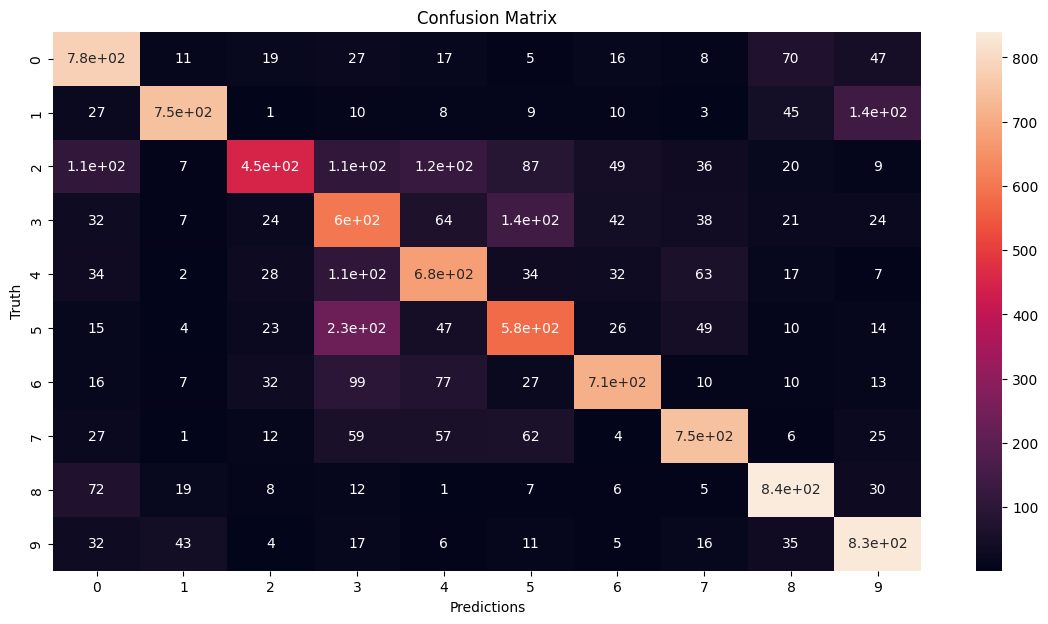

In [62]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(cm,annot=True)
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix")
plt.show()